In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ecommerce-data/data.csv


1️⃣ **Data upload and preparation**

Upload data.

Check for omissions, duplicates.

Bring column names to a convenient form.

In [10]:
# Downloading
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
# Cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['CustomerID'], inplace=True)

2️⃣ **Customer Behavior Analysis**

How many unique customers are there?

What products are purchased most often?

How often do customers shop?

In [15]:
# Number of unique customers
df['CustomerID'].nunique()

4372

In [16]:
# Top 10 products by sales
top_products = df['Description'].value_counts().head(10)

In [17]:
# Number of purchases per customer
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique()

3️⃣ **Top selling products**

What products are ordered most often?

How many returns? Number of purchases per customer.

In [18]:
# Top products by quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


In [19]:
# Returns (e.g. Quantity < 0)
returns = df[df['Quantity'] < 0]
returns_products = returns.groupby('Description')['Quantity'].sum().sort_values()

4️⃣ **Returns**

What is the percentage of returns?

What products are returned more often?

In [20]:
# Percentage of returns
total_quantity = df['Quantity'].sum()
returns_quantity = returns['Quantity'].sum()
returns_percent = abs(returns_quantity) / total_quantity * 100


5️⃣ **Customer segmentation (RFM analysis)**

R (Recency) - how long has it been since the last purchase?

F (Frequency) - how often does the customer buy?

M (Monetary) - how much money does the customer bring in? Returns percentage

In [22]:
# Example: the last order in the data is the date of analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [24]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [25]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

In [26]:
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

6️⃣ **Building KPIs**

Total revenue.

Average check.

Repeat orders.

In [27]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [28]:
total_revenue = df['TotalPrice'].sum()

In [29]:
average_order_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()

In [30]:
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique().gt(1).mean()

7️⃣ **Visualization**

Matplotlib, Seaborn, or Plotly can be used.

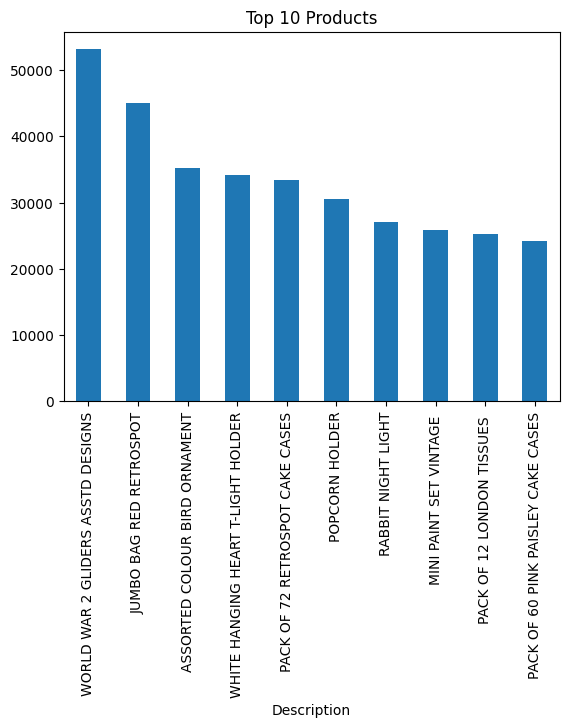

In [31]:
top_products.plot(kind='bar')
plt.title('Top 10 Products')
plt.show()